# Numerical Root-Finding Methods

**Student Name:** Altynay Yertay
**Course:** Computational Mathematics
**Assignment:** Root-Finding Methods
**Total Methods:** 6

---

## Selected Function

I consider the following function (Function №9):

\[
f(x) = e^x - 3x
\]

This function is continuous and suitable for all numerical root-finding methods.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.exp(x) - 3*x

tol = 1e-3
Nmax = 100

## Method 1: Bisection Method

The bisection method is a reliable technique that requires a continuous function
and an initial interval where the function changes sign.

In [3]:
a = 0
b = 1
iteration = 0

print("n\t x_n\t\t f(x_n)\t\t error")

while (b - a) / 2 > tol:
    c = (a + b) / 2
    error = (b - a) / 2
    iteration += 1

    print(f"{iteration}\t {c:.6f}\t {f(c):+.6f}\t {error:.6f}")

    if f(a) * f(c) < 0:
        b = c
    else:
        a = c

root_bis = (a + b) / 2
print("\nApproximate root:", round(root_bis, 6))
print("Iterations:", iteration)

n	 x_n		 f(x_n)		 error
1	 0.500000	 +0.148721	 0.500000
2	 0.750000	 -0.133000	 0.250000
3	 0.625000	 -0.006754	 0.125000
4	 0.562500	 +0.067555	 0.062500
5	 0.593750	 +0.029516	 0.031250
6	 0.609375	 +0.011156	 0.015625
7	 0.617188	 +0.002145	 0.007812
8	 0.621094	 -0.002319	 0.003906
9	 0.619141	 -0.000091	 0.001953

Approximate root: 0.618164
Iterations: 9


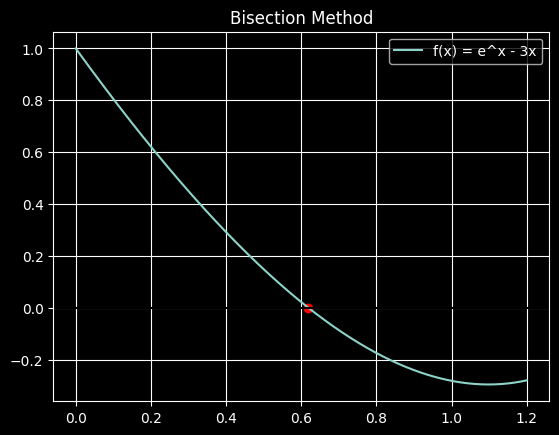

In [4]:
x = np.linspace(0, 1.2, 400)
y = f(x)

plt.plot(x, y, label="f(x) = e^x - 3x")
plt.axhline(0, color='black')
plt.scatter(root_bis, f(root_bis), color='red')
plt.title("Bisection Method")
plt.grid()
plt.legend()
plt.show()

**Stopping Criterion:**
The method stops when the interval error becomes smaller than the tolerance.

**Discussion:**
The bisection method guarantees convergence but converges slowly.

## Method 2: Fixed-Point Iteration

The equation is rewritten in the form \(x = g(x)\).

In [5]:
def g(x):
    return np.exp(x) / 3

x_old = 0.5
iteration = 0

print("n\t x_n\t\t f(x_n)\t\t error")

while iteration < Nmax:
    x_new = g(x_old)
    error = abs(x_new - x_old)
    iteration += 1

    print(f"{iteration}\t {x_new:.6f}\t {f(x_new):+.6f}\t {error:.6f}")

    if error < tol:
        break

    x_old = x_new

root_fp = x_new
print("\nApproximate root:", round(root_fp, 6))
print("Iterations:", iteration)

n	 x_n		 f(x_n)		 error
1	 0.549574	 +0.083793	 0.049574
2	 0.577505	 +0.049073	 0.027931
3	 0.593862	 +0.029382	 0.016358
4	 0.603657	 +0.017824	 0.009794
5	 0.609598	 +0.010898	 0.005941
6	 0.613231	 +0.006695	 0.003633
7	 0.615462	 +0.004125	 0.002232
8	 0.616837	 +0.002546	 0.001375
9	 0.617686	 +0.001573	 0.000849

Approximate root: 0.617686
Iterations: 9


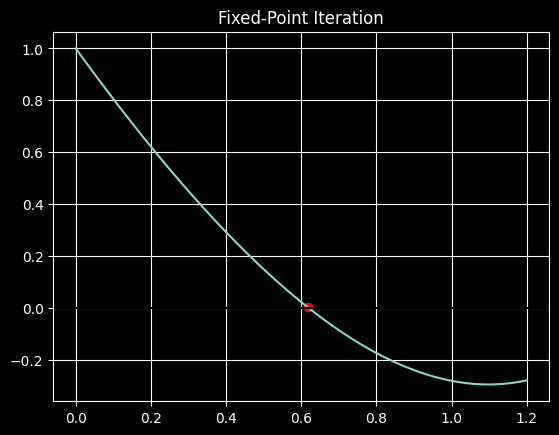

In [6]:
plt.plot(x, y)
plt.axhline(0, color='black')
plt.scatter(root_fp, f(root_fp), color='red')
plt.title("Fixed-Point Iteration")
plt.grid()
plt.show()

## Method 3: Newton–Raphson Method

In [7]:
def df(x):
    return np.exp(x) - 3

x_old = 0.5
iteration = 0

print("n\t x_n\t\t f(x_n)\t\t error")

while iteration < Nmax:
    x_new = x_old - f(x_old) / df(x_old)
    error = abs(x_new - x_old)
    iteration += 1

    print(f"{iteration}\t {x_new:.6f}\t {f(x_new):+.6f}\t {error:.6f}")

    if error < tol:
        break

    x_old = x_new

root_newton = x_new
print("\nApproximate root:", round(root_newton, 6))
print("Iterations:", iteration)

n	 x_n		 f(x_n)		 error
1	 0.610060	 +0.010362	 0.110060
2	 0.618997	 +0.000074	 0.008937
3	 0.619061	 +0.000000	 0.000065

Approximate root: 0.619061
Iterations: 3


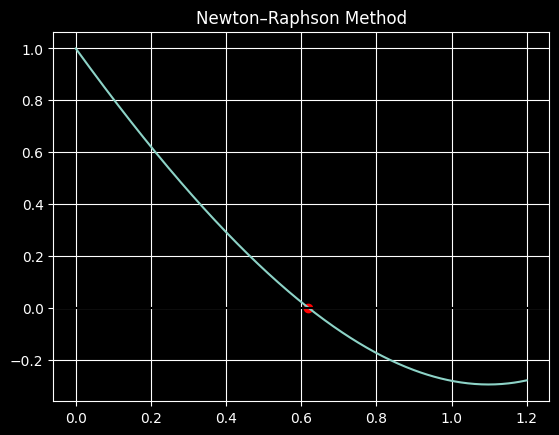

In [8]:
plt.plot(x, y)
plt.axhline(0, color='black')
plt.scatter(root_newton, f(root_newton), color='red')
plt.title("Newton–Raphson Method")
plt.grid()
plt.show()

## Method 4: Secant Method

In [9]:
x_prev = 0
x_curr = 1
iteration = 1

print("n\t x_n\t\t f(x_n)\t\t error")

while iteration < Nmax:
    x_next = x_curr - f(x_curr)*(x_curr - x_prev)/(f(x_curr) - f(x_prev))
    error = abs(x_next - x_curr)

    print(f"{iteration}\t {x_next:.6f}\t {f(x_next):+.6f}\t {error:.6f}")

    if error < tol:
        break

    x_prev = x_curr
    x_curr = x_next
    iteration += 1

root_secant = x_next
print("\nApproximate root:", round(root_secant, 6))
print("Iterations:", iteration)

n	 x_n		 f(x_n)		 error
1	 0.780203	 -0.158694	 0.219797
2	 0.496679	 +0.153218	 0.283524
3	 0.635952	 -0.019037	 0.139274
4	 0.620560	 -0.001711	 0.015392
5	 0.619040	 +0.000024	 0.001520
6	 0.619061	 -0.000000	 0.000021

Approximate root: 0.619061
Iterations: 6


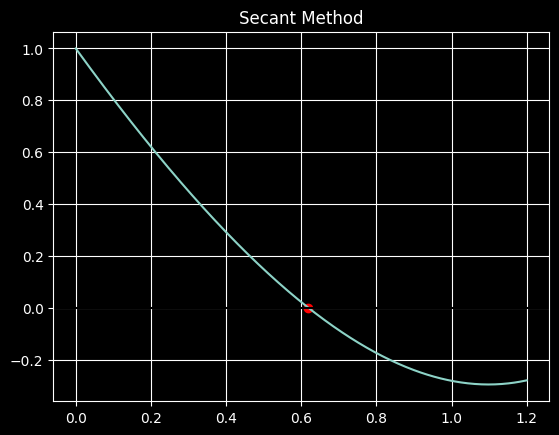

In [10]:
plt.plot(x, y)
plt.axhline(0, color='black')
plt.scatter(root_secant, f(root_secant), color='red')
plt.title("Secant Method")
plt.grid()
plt.show()

## Method 5: False Position (Regula Falsi)

In [11]:
a = 0
b = 1
iteration = 0
c_old = a

print("n\t x_n\t\t f(x_n)\t\t error")

while iteration < Nmax:
    c = (a*f(b) - b*f(a))/(f(b) - f(a))
    error = abs(c - c_old)
    iteration += 1

    print(f"{iteration}\t {c:.6f}\t {f(c):+.6f}\t {error:.6f}")

    if error < tol:
        break

    if f(a)*f(c) < 0:
        b = c
    else:
        a = c

    c_old = c

root_false = c
print("\nApproximate root:", round(root_false, 6))
print("Iterations:", iteration)

n	 x_n		 f(x_n)		 error
1	 0.780203	 -0.158694	 0.780203
2	 0.673347	 -0.059252	 0.106856
3	 0.635682	 -0.018736	 0.037665
4	 0.623991	 -0.005611	 0.011691
5	 0.620509	 -0.001653	 0.003481
6	 0.619485	 -0.000484	 0.001024
7	 0.619185	 -0.000142	 0.000300

Approximate root: 0.619185
Iterations: 7


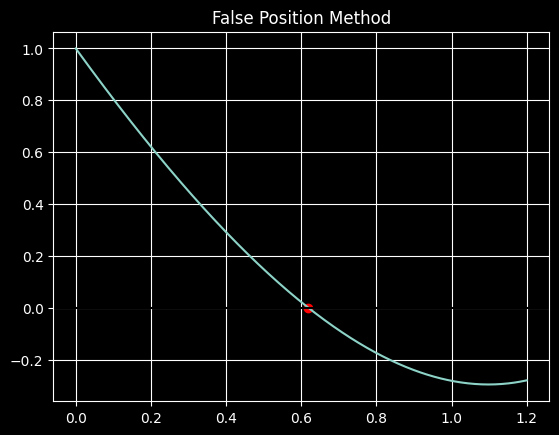

In [12]:
plt.plot(x, y)
plt.axhline(0, color='black')
plt.scatter(root_false, f(root_false), color='red')
plt.title("False Position Method")
plt.grid()
plt.show()

## Method 6: Muller's Method

In [13]:
x0, x1, x2 = 0, 0.5, 1
iteration = 0

print("n\t x_n\t\t f(x_n)\t\t error")

while iteration < Nmax:
    f0, f1, f2 = f(x0), f(x1), f(x2)
    h0, h1 = x1-x0, x2-x1
    d0, d1 = (f1-f0)/h0, (f2-f1)/h1
    a = (d1-d0)/(h1+h0)
    b = a*h1 + d1
    c = f2

    D = np.sqrt(b*b - 4*a*c)
    denom = b+D if abs(b+D) > abs(b-D) else b-D

    x3 = x2 - 2*c/denom
    error = abs(x3-x2)
    iteration += 1

    print(f"{iteration}\t {x3:.6f}\t {f(x3):+.6f}\t {error:.6f}")

    if error < tol:
        break

    x0, x1, x2 = x1, x2, x3

root_muller = x3
print("\nApproximate root:", round(root_muller, 6))
print("Iterations:", iteration)

n	 x_n		 f(x_n)		 error
1	 0.626549	 -0.008505	 0.373451
2	 0.618961	 +0.000114	 0.007588
3	 0.619061	 +0.000000	 0.000100

Approximate root: 0.619061
Iterations: 3


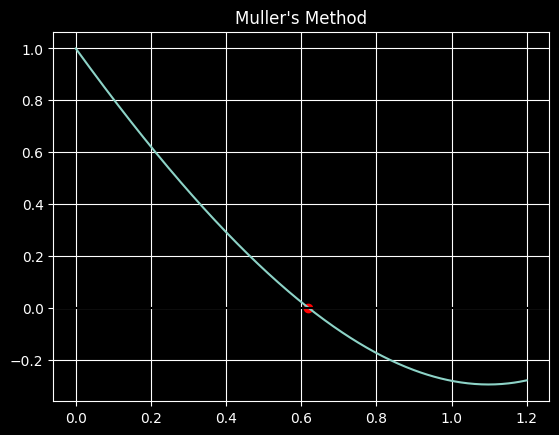

In [14]:
plt.plot(x, y)
plt.axhline(0, color='black')
plt.scatter(root_muller, f(root_muller), color='red')
plt.title("Muller's Method")
plt.grid()
plt.show()

## Comparison Summary

- Fastest method: Newton–Raphson
- Most reliable method: Bisection
- Methods without derivatives: Bisection, Fixed Point, Secant, False Position, Muller

## Overall Conclusion

Six numerical root-finding methods were implemented and analyzed for the function
\(f(x)=e^x-3x\). The results demonstrate the trade-offs between speed, reliability,
and computational complexity.
